In [85]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [86]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [87]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [88]:
train_images.shape

(60000, 28, 28)

In [89]:
len(train_labels)

60000

In [90]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [91]:
test_images.shape

(10000, 28, 28)

In [92]:
len(test_labels)

10000

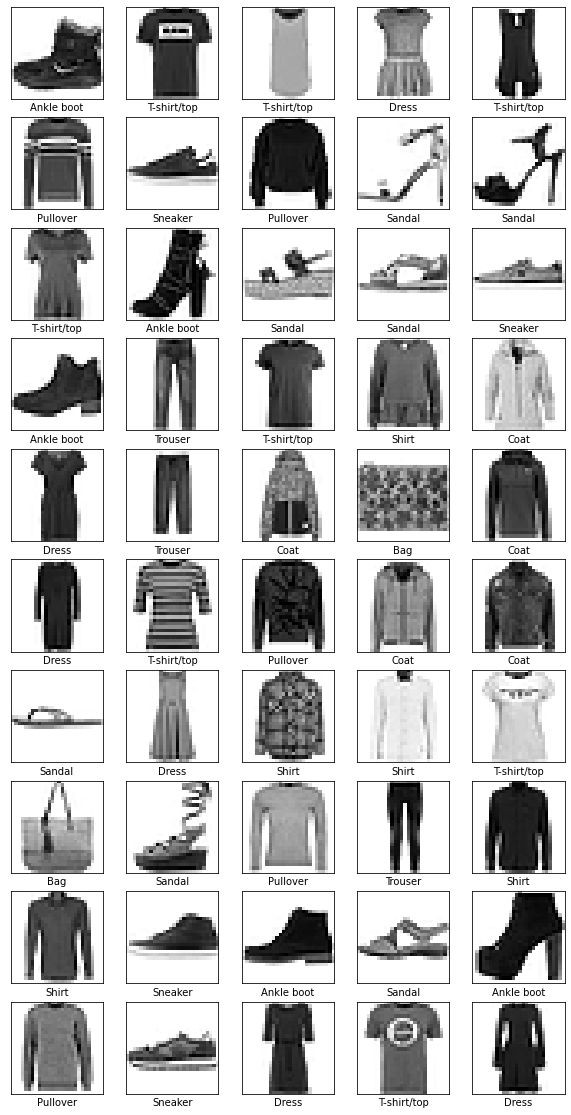

In [93]:
plt.figure(figsize=(10, 20))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [95]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']
)

In [96]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 819us/step - loss: 4.0870 - accuracy: 0.6942
Epoch 2/20
1875/1875 [==============================] - 2s 871us/step - loss: 0.7170 - accuracy: 0.7281
Epoch 3/20
1875/1875 [==============================] - 2s 875us/step - loss: 0.6068 - accuracy: 0.7674
Epoch 4/20
1875/1875 [==============================] - 2s 818us/step - loss: 0.5337 - accuracy: 0.8135
Epoch 5/20
1875/1875 [==============================] - 2s 826us/step - loss: 0.5029 - accuracy: 0.8270
Epoch 6/20
1875/1875 [==============================] - 2s 824us/step - loss: 0.4939 - accuracy: 0.8307
Epoch 7/20
1875/1875 [==============================] - 2s 895us/step - loss: 0.4827 - accuracy: 0.8357
Epoch 8/20
1875/1875 [==============================] - 2s 809us/step - loss: 0.4735 - accuracy: 0.8390
Epoch 9/20
1875/1875 [==============================] - 2s 897us/step - loss: 0.4681 - accuracy: 0.8403
Epoch 10/20
1875/1875 [==============================] - 2s 931u

In [97]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 0s - loss: 0.5733 - accuracy: 0.8211 - 274ms/epoch - 876us/step


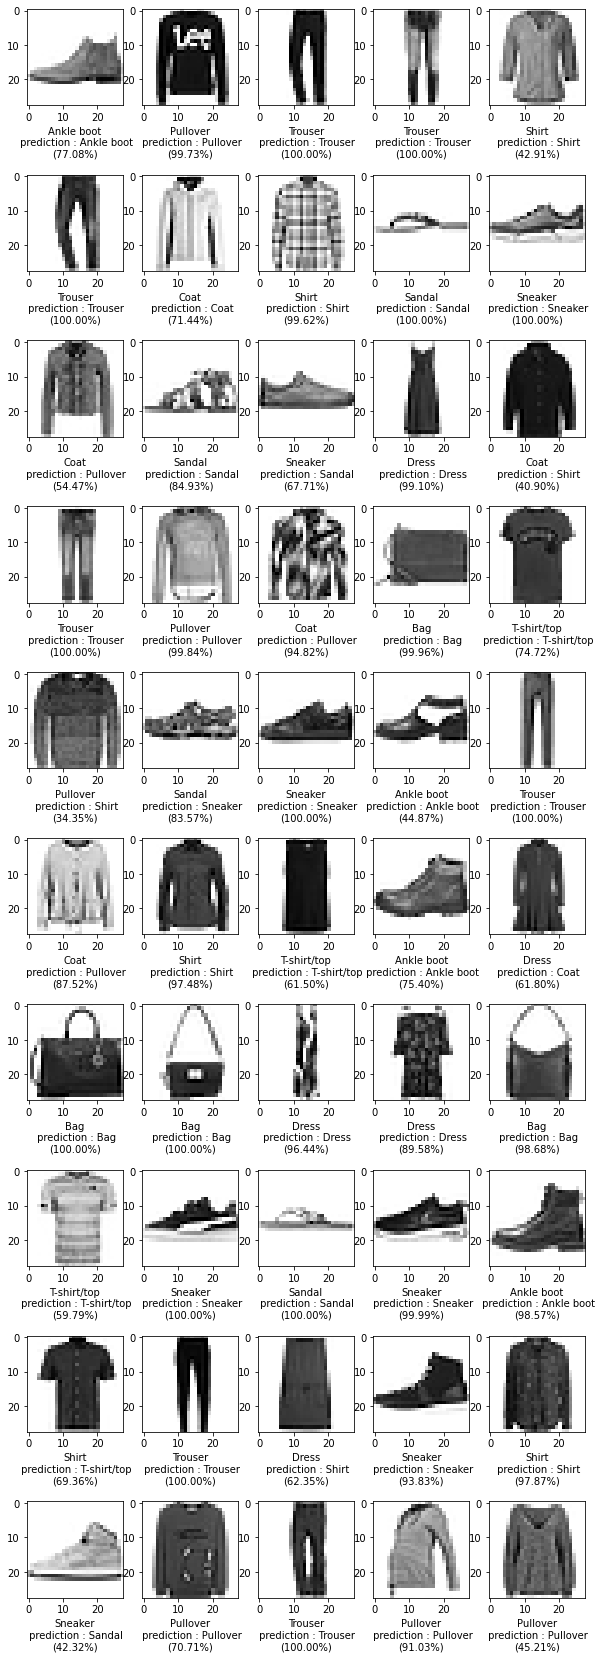

In [114]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
plt.figure(figsize=(10, 30))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]] + "\n prediction : " + class_names[np.argmax(predictions[i])] + "\n(" + "{0:0.2f}".format(100 * predictions[i][np.argmax(predictions[i])]) + "%)")
plt.show()